## Thinking1：奇异值分解SVD的原理是怎样的，都有哪些应用场景

原理：

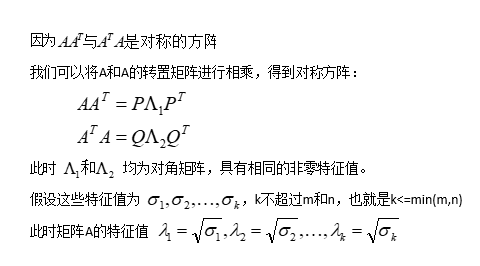


实质：

利用 SVD 实现，我们能用小得多的数据集来表示原始数据集，这样实际上是去除了噪声和冗余信息，SVD起到了从噪声数据里面提取特征的作用

应用场景：

SVD 一般应用场景--推荐系统，图像压缩（降维）

## Thinking2：funkSVD, BiasSVD，SVD++算法之间的区别是怎样的

1. funkSVD:
- 需要设置取多少个奇异值 K 计算，来对矩阵近似求解
- 通过左右奇异矩阵 P,Q 将矩阵补全
- 矩阵补全以后，再预测，实际上噪声比较大。矩阵分解之后的还原，只需要关注与原矩阵中有值的位置进行对比即可，不需要对所有元素进行对比
- 针对某个用户 i ，查找之前缺失值的位置，按照补全值从大到小进行推荐
2. BiasSVD
- 用户有自己的偏好(Bias)，比如乐观的用户打分偏高
- 商品也有自己的偏好（Bias),比如质量好的商品，打分偏高
- 将与个性化无关的部分设置为偏好（Bias)部分
3. SVD ++ 
- 在 BiasSVD 的算法基础上进行了改进，考虑用户的隐式反馈（隐式反馈：没有具体的评分，但是可能有点击、浏览等行为）



## Thinking3：矩阵分解算法在推荐系统中有哪些应用场景，存在哪些不足

MF应用场景：
- 尤其是评分预测类的场景，可以获得非常好的预测效果


MF存在的不足：
- 只考虑 user 和 item 两个特征，对于其他特征的利用我们需要使用新的工具，比如 FM(因子分解机）

## Thinking4：假设一个小说网站，有N部小说，每部小说都有摘要描述。如何针对该网站制定基于内容的推荐系统，即用户看了某部小说后，推荐其他相关的小说。原理和步骤是怎样的

1. 原理
- 物品表示 Item Representation
  - 为每个item抽取出features（这里可以使用 TF-IDF 以及 N-Gram的模型）
- 特征学习 Profile Learning
  - 利用一个用户过去喜欢（不喜欢）的item的特征数据，来学习该用户的喜好特征（profile)
- 生成推荐列表 Recommendation Generation:
  - 通过用户 profile 与 候选 item 的特征，推荐相关性最大的 item
2. 步骤
- Step1:对小说摘要描述进行特征提取
  - N-Gram,提取N个连续字的集合，作为特征
  - TF-IDF，按照（min_df,max_df)提取关键词，并生成TF-IDF矩阵
- Step2:计算小说之间的相似度矩阵
  - 余弦相似度
- Step3:对于用户已经观看的指定小说，选择相似度最大的Top-K个小说进行输出

## Thinking5：Word2Vec的应用场景有哪些

- 相似文本抄袭检测
- 相似大 V 推荐
- 相似商品推荐

## Action1：选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构，当奇异值数量为原有的1%，10%，50%时，输出重构后的图像

In [6]:
import numpy as np 
from scipy.linalg import svd 
from PIL import Image 
import matplotlib.pyplot as plt
import cv2

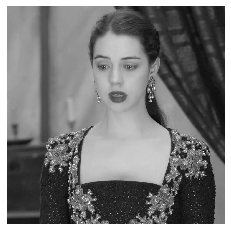

奇异值的总数量： 958
输出前 1%,10%,以及50需要的奇异值数量为： [9, 95, 479]


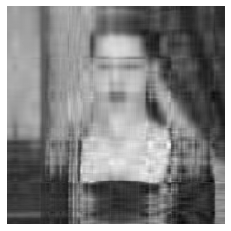

[[ 5.75538818  5.92134779  6.08556969 ... 23.16718101 24.34102386
  24.82029309]
 [ 5.76341133  5.93044956  6.09539456 ... 23.32189927 24.49198648
  24.96921762]
 [ 5.70088482  5.86857336  6.03267916 ... 22.57352199 24.74603846
  25.22415848]
 ...
 [-5.06481484 -5.10603181 -4.33073115 ... 10.24841777 10.45184299
  10.64370327]
 [-2.27029229 -2.30402679 -2.51937505 ... 12.25121667 12.4858811
  12.7036785 ]
 [-0.48196261 -0.50946576  0.28482864 ... 15.26271257 15.50238219
  15.72476138]]


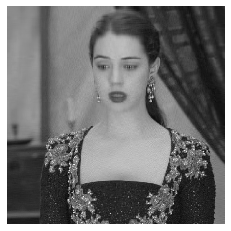

[[ 0.25198827  0.27401419  0.45199903 ... -2.4863526  -3.08246627
  -3.56337279]
 [ 0.14287413  0.16260992  0.32057042 ... -1.78017556 -2.37571631
  -2.85773118]
 [-0.11960339 -0.1123848   0.02380344 ... -1.96912015 -1.6041403
  -2.09707304]
 ...
 [ 0.6829804   0.758572    1.47201677 ... -3.48378366 -3.65721383
  -3.33336415]
 [ 1.75108036  2.19825284  2.20583396 ... -2.81645796 -3.05253763
  -2.91179913]
 [ 2.00463118  2.37699291  3.44520364 ... -1.91437344 -1.78031414
  -1.57653462]]


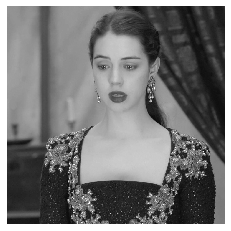

[[ 0.16615915  0.09002359  0.32799307 ... -0.14942654 -0.25554392
   0.15930002]
 [ 0.21467958  0.15110104  0.25858956 ...  0.30605952  0.11733809
   0.0359332 ]
 [-0.0343847  -0.10743855  0.09518378 ... -0.24645884  0.31158835
   0.00060226]
 ...
 [-0.11254151  0.012752    0.27675207 ...  0.21628847 -0.16193102
  -0.2616901 ]
 [-0.06464911 -0.06134714 -0.19996176 ... -0.16817105  0.04685376
   0.23168181]
 [ 0.08107515  0.04520504  0.09369862 ...  0.09773778  0.02273081
  -0.07547233]]


In [19]:
# 取前 k 个特征，对图像进行还原
def get_image_feature(s,k):
    # d对于 S 只保留前 K 个特征
    s_temp = np.zeros(s.shape[0])
    s_temp[0:k] = s[0:k]
    s = s_temp * np.identity(s.shape[0])  # identity 的作用是创建一个单位矩阵
    # 用新的 s_temp ,以及 p,q 重构 A 
    temp = np.dot(p,s)
    temp = np.dot(temp,q)
    plt.imshow(temp,cmap = plt.cm.gray,interpolation = 'nearest')
    plt.axis('off')
    plt.show()
    print(A - temp)
    
# 加载 256 色图片 
# image = Image.open('./1.jpg')
image = cv2.imread('./1.jpg',cv2.IMREAD_GRAYSCALE)
A = np.array(image)
# 显示图片 
plt.imshow(A,cmap = plt.cm.gray,interpolation = 'nearest')
plt.axis('off')
plt.show()

# 对图像矩阵A 进行奇异值分解，得到 p,s,q
p,s,q = svd(A,full_matrices = False)
# 取前 K % 个特征，对图像进行还原
s_sum  = len(s)
print('奇异值的总数量：',s_sum)
s_per = [0.01,0.1,0.5]
s_sum_per = [int(s_sum * per) for per in s_per]
print('输出前 1%,10%,以及50需要的奇异值数量为：',s_sum_per)
for sum_per in s_sum_per:
    get_image_feature(s,sum_per)

## Action2：使用Google Colab编辑器，对MovieLens数据集进行评分预测，计算RMSE（使用funkSVD, BiasSVD，SVD++）

In [4]:
pwd

'F:\\Jupyter_notebook_workdir\\BI\\week3'

In [39]:
# 目前colab已经集成加载google drive云端硬盘的功能了,为了交作业有输出，我又在本地跑了下
from surprise import SVD,SVDpp
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import pandas as pd

# 数据读取
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('F:\\Jupyter_notebook_workdir\\BI\\week3\\MovieLens\\ratings.csv', reader=reader)
train_set = data.build_full_trainset()

# 使用funkSVD
algo_funk = SVD(biased=False)
algo_bias = SVD(biased = True)
algo_pp = SVDpp() 

# 定义K折交叉验证迭代器，K=3
kf = KFold(n_splits=3)
print('funkSVD 的RMSE值为：')
for trainset, testset in kf.split(data):
    # 训练并预测
    algo_funk.fit(trainset)  
    predictions_funk = algo_funk.test(testset)
    # 计算RMSE
    accuracy.rmse(predictions_funk, verbose=True)
    
print('biasSVD 的RMSE值为：')
for trainset, testset in kf.split(data):    
    algo_bias.fit(trainset)
    predictions_bias = algo_bias.test(testset)
    accuracy.rmse(predictions_bias,verbose = True)
    
print('SVD++ 的 RMSE值为：')   
for trainset, testset in kf.split(data):
    algo_pp.fit(trainset)
    predictions_pp = algo_pp.test(testset)
    accuracy.rmse(predictions_pp,verbose = True)


uid = str(196)
iid = str(302)
# 输出uid对iid的预测结果
print('使用 funkSVD 预测的结果是：')
pred = algo_funk.predict(uid, iid, r_ui=4, verbose=True)
print('使用 biasSVD 预测的结果是：')
pred = algo_bias.predict(uid,iid,r_ui = 4,verbose = True)
print('使用 SVD++ 预测的结果是：')
pred = algo_pp.predict(uid,iid,r_ui = 4,verbose = True)

funkSVD 的RMSE值为：
RMSE: 0.8731
RMSE: 0.8724
RMSE: 0.8728
biasSVD 的RMSE值为：
RMSE: 0.8465
RMSE: 0.8452
RMSE: 0.8453
SVD++ 的 RMSE值为：
RMSE: 0.8273
RMSE: 0.8322
RMSE: 0.8288
使用 funkSVD 预测的结果是：
user: 196        item: 302        r_ui = 4.00   est = 3.97   {'was_impossible': False}
使用 biasSVD 预测的结果是：
user: 196        item: 302        r_ui = 4.00   est = 3.95   {'was_impossible': False}
使用 SVD++ 预测的结果是：
user: 196        item: 302        r_ui = 4.00   est = 3.82   {'was_impossible': False}


## Action3：使用Gensim中的Word2Vec对三国演义进行Word Embedding，分析和曹操最相近的词有哪些，曹操+刘备-张飞=?

### 1.数据处理

In [29]:
# -*-coding: utf-8 -*-
import jieba
import os 
from utils import files_processing

# 源文件所在目录
source_folder = './three_kingdoms/source'
segment_folder = './three_kingdoms/segment'
stopwords = './three_kingdoms/source/stop.txt'
# 字词分割，对整个文件内容进行字词分割
def segment_lines(file_list,segment_out_dir,stopwords = []):
    for i,file in enumerate(file_list):
        segment_out_name = os.path.join(segment_out_dir,'segment_{}.txt'.format(i))
        with open(file,'rb') as f:
            document = f.read()
            document_cut = jieba.cut(document)
            sentence_segment = []
            for word in document_cut:
                if word not in stopwords:
                    sentence_segment.append(word)
            result = ' '.join(sentence_segment)
            result = result.encode('utf-8')
            with open(segment_out_name,'wb') as f2:
                f2.write(result)
                
# 对 source 中的 txt 文件进行分词，输出到 segment 目录中
file_list = files_processing.get_files_list(source_folder,postfix = '*.txt')
segment_lines(file_list,segment_folder)

#### 2.将 Word 转化成 Vec,然后进行 word_similarity 计算

In [31]:
from gensim.models import word2vec
import multiprocessing

# 如果目录有多个文件，可以使用 PathLineSentences
segment_folder = './three_kingdoms/segment/segment_1.txt'
sentences = word2vec.PathLineSentences(segment_folder)

# 设置模型参数，进行训练
model = word2vec.Word2Vec(sentences,size = 100,window = 3,min_count = 1)
model.save('./models/word2Vec_three_kindoms.model')
print('与曹操最像的词是：')
print(model.wv.most_similar(positive = ['曹操']))
print('曹操+刘备-张飞=')
print(model.wv.most_similar(positive = ['曹操','刘备'],negative = ['张飞']))

与曹操最像的词是：
[('关公', 0.9944908022880554), ('孔明', 0.9934727549552917), ('众将', 0.9932929277420044), ('众官', 0.9930509924888611), ('他', 0.992996096611023), ('拍手', 0.9925613403320312), ('夫人', 0.9925040006637573), ('又', 0.9923139810562134), ('孙权', 0.9922706484794617), ('先主', 0.9919320940971375)]
曹操+刘备-张飞=
[('主公', 0.9969453811645508), ('丞相', 0.9968713521957397), ('臣', 0.9962915778160095), ('今', 0.9957873821258545), ('近闻', 0.9943650364875793), ('朕', 0.9942536354064941), ('既', 0.9939456582069397), ('某', 0.9938945174217224), ('卿', 0.9938191771507263), ('今番', 0.9933819770812988)]
